MILESTONE 1:Data Preparation & Initial Analysis

In [106]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Change path to your CSV location
file_path = '/content/drive/MyDrive/GlobalWeatherRepository.csv'
df = pd.read_csv(file_path, low_memory=False)

In [109]:
# STEP 3: Basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Shape: (88468, 41)

Data Types:
 country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_inde

In [110]:
# STEP 4: Check for missing values
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing_Values']
missing_summary['Missing_%'] = (missing_summary['Missing_Values'] / len(df)) * 100
print("\nMissing Values Summary:\n", missing_summary.sort_values("Missing_%", ascending=False))


Missing Values Summary:
                           Column  Missing_Values  Missing_%
0                        country               0        0.0
1                  location_name               0        0.0
2                       latitude               0        0.0
3                      longitude               0        0.0
4                       timezone               0        0.0
5             last_updated_epoch               0        0.0
6                   last_updated               0        0.0
7            temperature_celsius               0        0.0
8         temperature_fahrenheit               0        0.0
9                 condition_text               0        0.0
10                      wind_mph               0        0.0
11                      wind_kph               0        0.0
12                   wind_degree               0        0.0
13                wind_direction               0        0.0
14                   pressure_mb               0        0.0
15            

In [111]:
# STEP 5: Inspect numerical columns (stats)
print("\nNumerical Summary:\n", df.describe())


Numerical Summary:
            latitude     longitude  last_updated_epoch  temperature_celsius  \
count  88468.000000  88468.000000        8.846800e+04         88468.000000   
mean      19.125807     22.172462        1.735550e+09            22.688292   
std       24.470764     65.836842        1.137876e+07             9.087760   
min      -41.300000   -175.200000        1.715849e+09           -24.900000   
25%        3.750000     -6.836100        1.725798e+09            18.000000   
50%       17.250000     23.316700        1.735555e+09            25.000000   
75%       40.400000     50.580000        1.745399e+09            28.400000   
max       64.150000    179.220000        1.755160e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            88468.000000  88468.000000  88468.000000  88468.000000   
mean                72.840627      8.290632     13.345725    170.576988   
std                 16.357748      8.131214     13.

In [112]:
#print the column names
print(df.columns.tolist())

['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


In [113]:
#drop the similar columns
df = df.drop(columns=['temperature_fahrenheit']) # Already dropped
df = df.drop(columns=['feels_like_fahrenheit']) # Dropping Celsius in a new cell

In [114]:
#print the column names to check whether the similar columns are dropped or not
print(df.columns.tolist())

['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


In [115]:
# STEP 7: Parse date column
# Replace 'date' with the actual date column name in your dataset
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

In [116]:
# STEP 8: Aggregate daily → monthly
# This reduces size and helps with seasonal trends
monthly_df = (
    df.groupby([pd.Grouper(key='last_updated', freq='ME'), 'country'])  # adjust 'country' column name if needed
    .agg({
        'temperature_celsius': 'mean',
        'humidity': 'mean',
        'precip_mm': 'sum',
        'wind_kph': 'mean'
    })
    .reset_index()
)

print("\nMonthly Aggregated Data:\n", monthly_df.head())


Monthly Aggregated Data:
   last_updated      country  temperature_celsius   humidity  precip_mm  \
0   2024-05-31  Afghanistan            20.305882  38.058824       1.85   
1   2024-05-31      Albania            25.647059  57.529412       5.02   
2   2024-05-31      Algeria            26.117647  45.705882       0.01   
3   2024-05-31      Andorra            12.423529  60.882353       5.98   
4   2024-05-31       Angola            29.088235  69.764706       0.00   

    wind_kph  
0  11.517647  
1  13.076471  
2  22.617647  
3   9.876471  
4  19.594118  


In [117]:
# STEP 9: Save cleaned & aggregated dataset
df.to_csv("cleaned_weather_data.csv", index=False)
monthly_df.to_csv("monthly_weather_data.csv", index=False)

print("\n✅ Data cleaning complete. Files saved: cleaned_weather_data.csv, monthly_weather_data.csv")


✅ Data cleaning complete. Files saved: cleaned_weather_data.csv, monthly_weather_data.csv


MILESTONE 1 COMPLETED

MILESTONE 2: CORE ANALYSIS AND VISUALIZATION

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

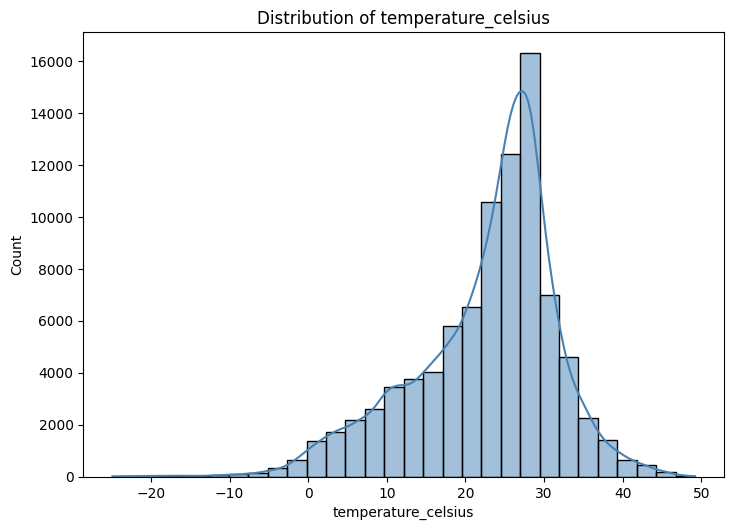

In [119]:
# 1. Distributions of temperature Variables

num_cols = ['temperature_celsius']

plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=30, color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=12)
plt.tight_layout()
plt.show()

#count is the number of rows present in dataset

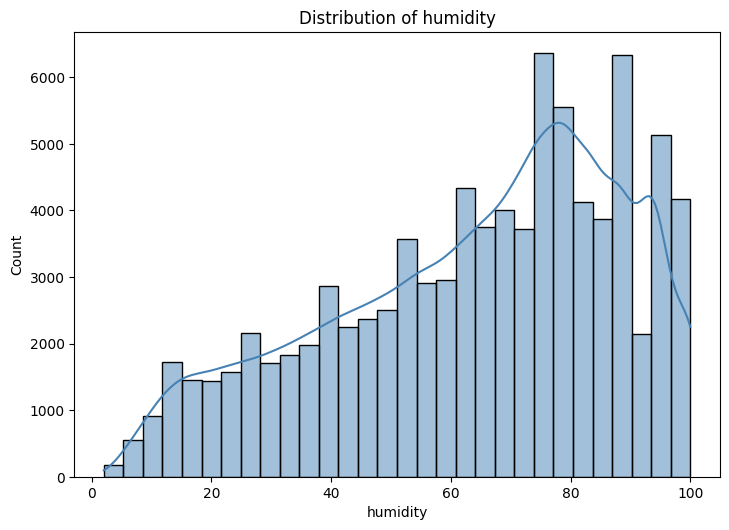

In [120]:
# 2. Distributions of humidity Variables

num_cols = ['humidity']

plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=30, color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=12)
plt.tight_layout()
plt.show()

#count is the number of rows.

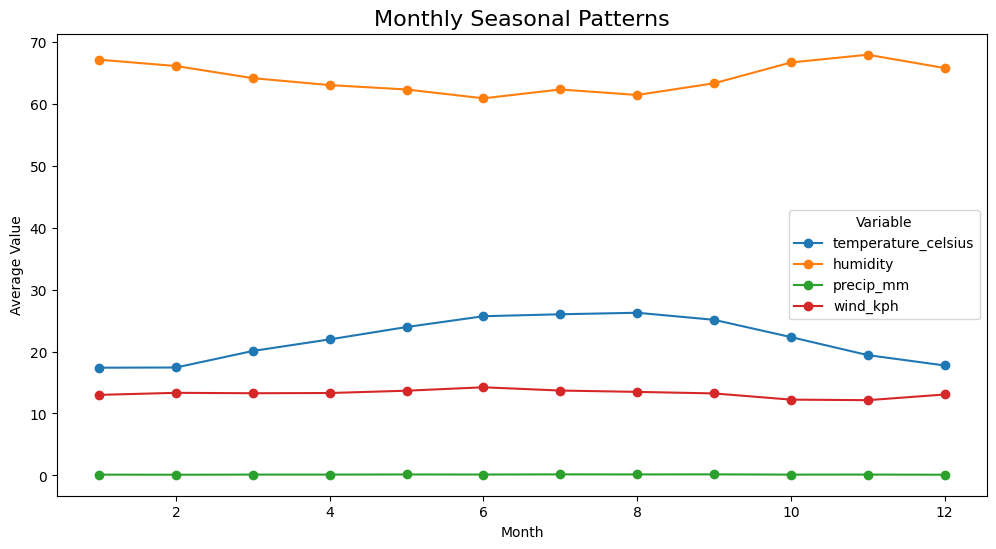

In [121]:
# 3. Seasonal Patterns (Monthly)

df['month'] = df['last_updated'].dt.month
num_cols = ['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph']
monthly_avg = df.groupby('month')[num_cols].mean()

monthly_avg.plot(figsize=(12,6), marker='o')
plt.title("Monthly Seasonal Patterns", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend(title="Variable")
plt.show()

In [128]:
#4. Correlation matrix of weather variables
import plotly.express as px

# Calculate the correlation matrix
numerical_cols = ['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph', 'pressure_mb', 'visibility_km', 'uv_index'] # Add other relevant numerical columns
corr = df[numerical_cols].corr()

fig = px.imshow(
    corr,
    text_auto=".2f",          # show values
    color_continuous_scale="RdBu_r",
    zmin=-1, zmax=1,
    title="Correlation Matrix of Weather Variables"
)
fig.update_layout(width=600, height=500)
fig.show()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

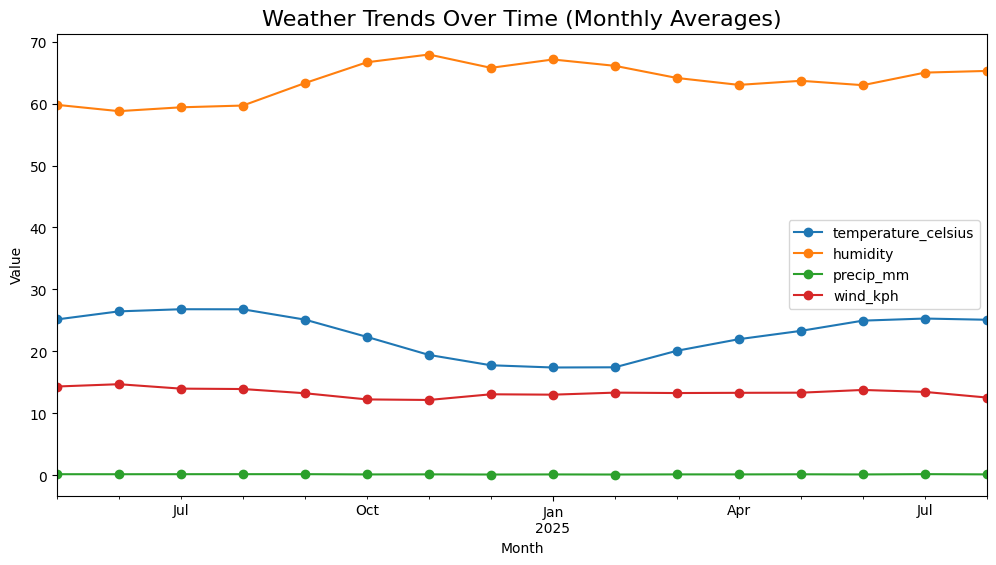

In [123]:
#5. weather trends over month
monthly_trends = df.groupby(df['last_updated'].dt.to_period("M"))[['temperature_celsius','humidity','precip_mm','wind_kph']].mean()
monthly_trends.index = monthly_trends.index.to_timestamp()  # convert back to datetime

monthly_trends.plot(figsize=(12,6), marker="o")
plt.title("Weather Trends Over Time (Monthly Averages)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Value")
plt.show()

In [124]:
# 6. Extreme weather Events
print("\n Highest Temperature Recorded:")
print(df.loc[df['temperature_celsius'].idxmax()])

print("\n Lowest Temperature Recorded:")
print(df.loc[df['temperature_celsius'].idxmin()])

print("\n Maximum Precipitation Recorded:")
print(df.loc[df['precip_mm'].idxmax()])

print("\n Strongest Wind Recorded:")
print(df.loc[df['wind_kph'].idxmax()])


 Highest Temperature Recorded:
country                                      Kuwait
location_name                           Kuwait City
latitude                                      29.37
longitude                                     47.96
timezone                                Asia/Kuwait
last_updated_epoch                       1718804700
last_updated                    2024-06-19 16:45:00
temperature_celsius                            49.2
condition_text                                Sunny
wind_mph                                       13.6
wind_kph                                       22.0
wind_degree                                     330
wind_direction                                  NNW
pressure_mb                                   996.0
pressure_in                                   29.42
precip_mm                                       0.0
precip_in                                       0.0
humidity                                          4
cloud                           

In [129]:
#7. Compare Weather Across Regions
country_avg = df.groupby('country')[['temperature_celsius','humidity','precip_mm','wind_kph']].mean().reset_index()

# Top 10 hottest countries
print("\nTop 10 hottest countries:\n", country_avg.sort_values('temperature_celsius', ascending=False).head(10))

# Choropleth Map (interactive with Plotly)
import plotly.express as px
fig = px.choropleth(country_avg,
                    locations="country",
                    locationmode="country names",
                    color="temperature_celsius",
                    hover_name="country",
                    title="🌍 Average Temperature by Country")
fig.show()

plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")



Top 10 hottest countries:
                   country  temperature_celsius   humidity  precip_mm  \
157         Saudi Arabien            45.000000   7.000000   0.000000   
113              Marrocos            40.300000  14.000000   0.000000   
188          Turkménistan            37.800000  11.000000   0.000000   
146                 Qatar            34.232599  36.226872   0.000485   
93                 Kuwait            34.018022  22.808791   0.003934   
207                Турция            34.000000  44.000000   0.000000   
156          Saudi Arabia            33.954967  14.633554   0.001435   
193  United Arab Emirates            33.903736  41.914286   0.000220   
47               Djibouti            32.951214  52.512141   0.027638   
135                  Oman            32.452747  51.149451   0.001077   

      wind_kph  
157  24.500000  
113  16.900000  
188  22.000000  
146  19.782379  
93   17.510549  
207  24.100000  
156  16.049890  
193  17.305055  
47   17.274393  
135  16.0

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-2174661605.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




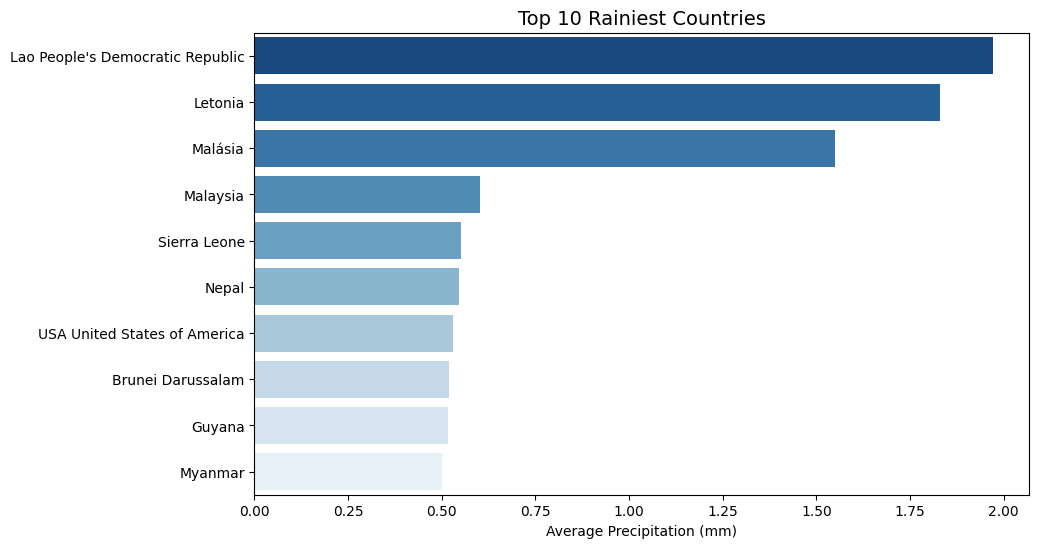

In [126]:
#8. Bar chart of precipitation by country (Top 10)
top_rain = country_avg.sort_values("precip_mm", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_rain, x="precip_mm", y="country", palette="Blues_r")
plt.title("Top 10 Rainiest Countries", fontsize=14)
plt.xlabel("Average Precipitation (mm)")
plt.ylabel("")
plt.show()

In [130]:
#9. Humidity across the country
import plotly.express as px

fig = px.choropleth(country_avg,
                    locations="country",
                    locationmode="country names",
                    color="humidity",
                    hover_name="country",
                    title="🌍 Average Humidity by Country",
                    color_continuous_scale="Blues")
fig.show()

plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

Milestone 2 in progress